In [2]:
import csv

filename = 'michelin-restaurants.csv'
with open(filename, 'r') as file:
    reader = csv.DictReader(file)
    data = list(reader)

class Coordinate:
    def __init__(self, latitude, longtitude):
        self.latitude = latitude
        self.longitude = longtitude

class Restaurant:
    def __init__(self, name, year, city, region, cuisine, price, stars, location):
        self.name = name
        self.year = year
        self.city = city
        self.region = region
        self.cuisine = cuisine
        self.price = price
        self.stars = stars
        self.location = location

# 2. Create a function called `restaurants_for_cuisine` that accepts any cuisine name and returns a list with elements of type `Restaurant` with all the restaurants that belong to that cuisine.
def restaurants_for_cuisine(cuisine_name):
    return [restaurant for restaurant in restaurants if restaurant.cuisine == cuisine_name]
# 3. Create a function called `restaurants_for_star` that accepts any integer and returns a list of with elements of type `Restaurant` with all the restaurants that have that number of stars.
def restaurants_for_star(number_of_stars):
    return [restaurant for restaurant in restaurants if restaurant.star == number_of_stars]
# 4. Create a function called `restaurants_for_city` that accepts any city name and returns a list of with elements of type `Restaurant` with all the restaurants that are part of that city.
def restaurants_for_city(city_name):
    return [restaurant for restaurant in restaurants if restaurant.city == city_name]
# 5. Create a function called `gothenburg_michelins` that return a list with elementss of type `Restaurant` with all the Michelin restaurants located in Gothenburg. 
def gothenburg_michelins():
    return [restaurant for restaurant in restaurants if restaurant.city == "Gothenburg" and restaurant.stars > 0]

restaurants = []

for entry in data:
    name = entry["name"]
    year = entry["year"]
    city = entry["city"]
    region = entry["region"]
    cuisine = entry["cuisine"]
    price = entry["price"]
    stars = int(entry["stars"])
    latitude = float(entry["latitude"])
    longitude = float(entry["longitude"])
    location = Coordinate(latitude, longitude)

    restaurant = Restaurant(name, year, city, region, cuisine, price, stars, location)
    restaurants.append(restaurant)


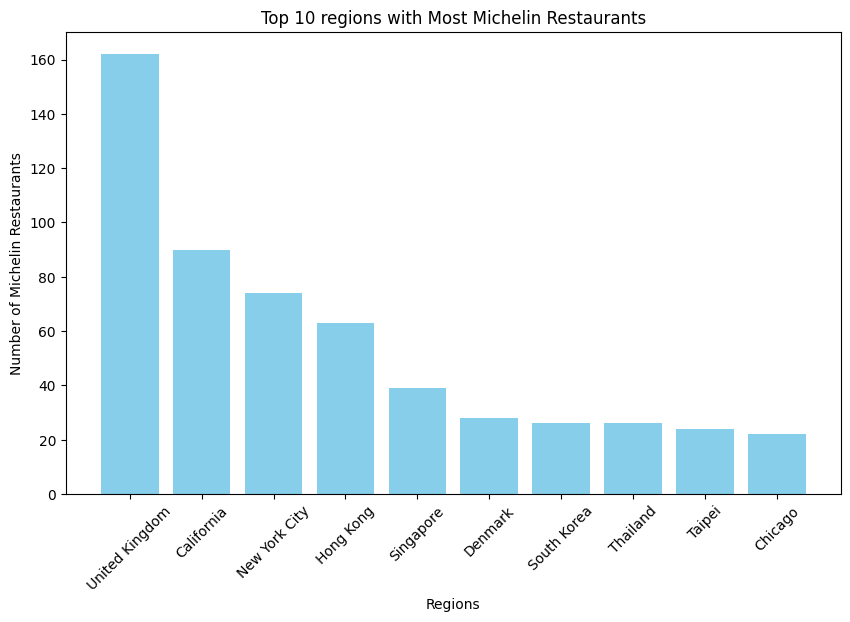

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

region_names = []
counts = []

regions = [
    restaurant.region
    for restaurant in restaurants
    if restaurant.stars > 0
]
top_regions = Counter(regions).most_common(10)

for region, count in top_regions:
    region_names.append(region)
    counts.append(count)

plt.figure(figsize = (10, 6))
plt.bar(region_names, counts, color='skyblue')
plt.xlabel('Regions')
plt.ylabel('Number of Michelin Restaurants')
plt.title('Top 10 regions with Most Michelin Restaurants')
plt.xticks(rotation = 45)
plt.show()


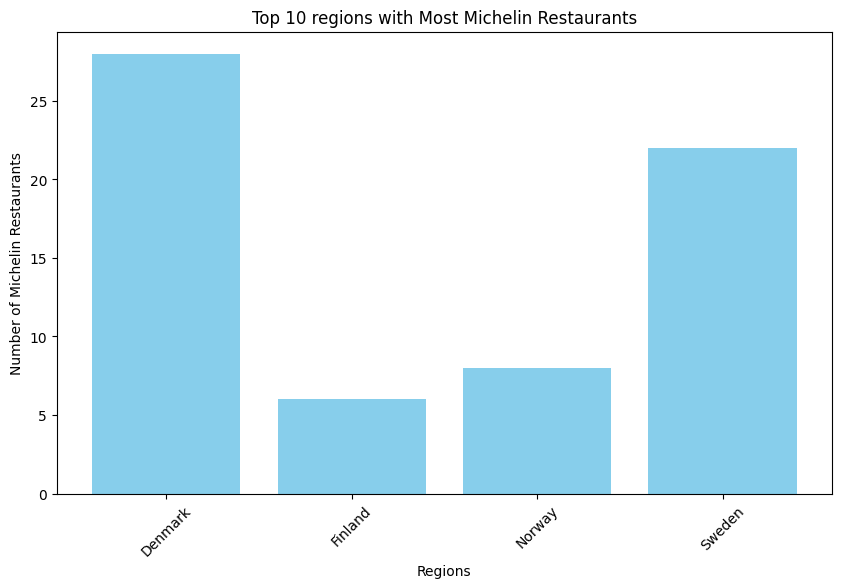

In [4]:
nordic_countries = ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland']

regions = [
    restaurant.region
    for restaurant in restaurants
    if restaurant.region in nordic_countries
]
regions_count = Counter(regions)


plt.figure(figsize = (10, 6))
plt.bar(regions_count.keys(), regions_count.values(), color='skyblue')
plt.xlabel('Regions')
plt.ylabel('Number of Michelin Restaurants')
plt.title('Top 10 regions with Most Michelin Restaurants')
plt.xticks(rotation = 45)
plt.show()


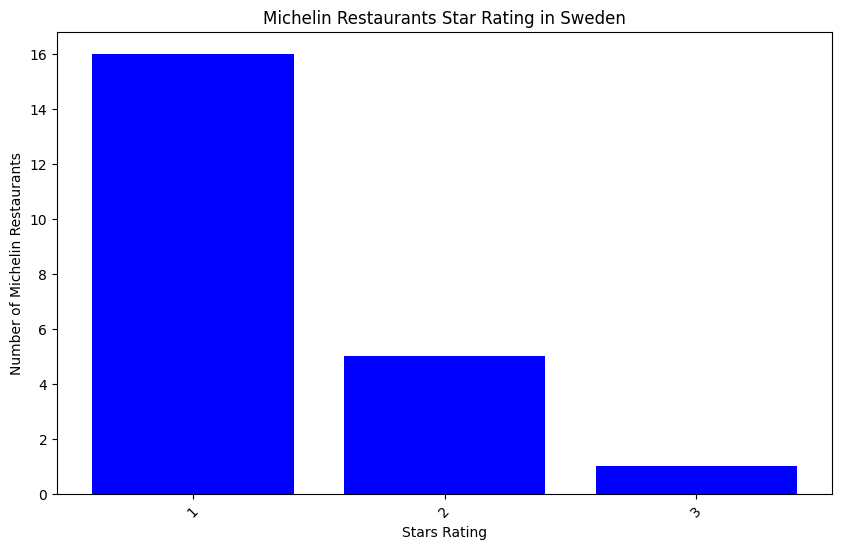

In [5]:
stars = [
    str(restaurant.stars)
    for restaurant in restaurants
    if 1 <= restaurant.stars <= 3
    and restaurant.region == 'Sweden'
]
stars_count = Counter(stars)
stars, count = zip(*sorted(stars_count.items()))

plt.figure(figsize = (10, 6))
plt.bar(stars, count, color='blue')
plt.xlabel('Stars Rating')
plt.ylabel('Number of Michelin Restaurants')
plt.title('Michelin Restaurants Star Rating in Sweden')
plt.xticks(rotation = 45)
plt.show()


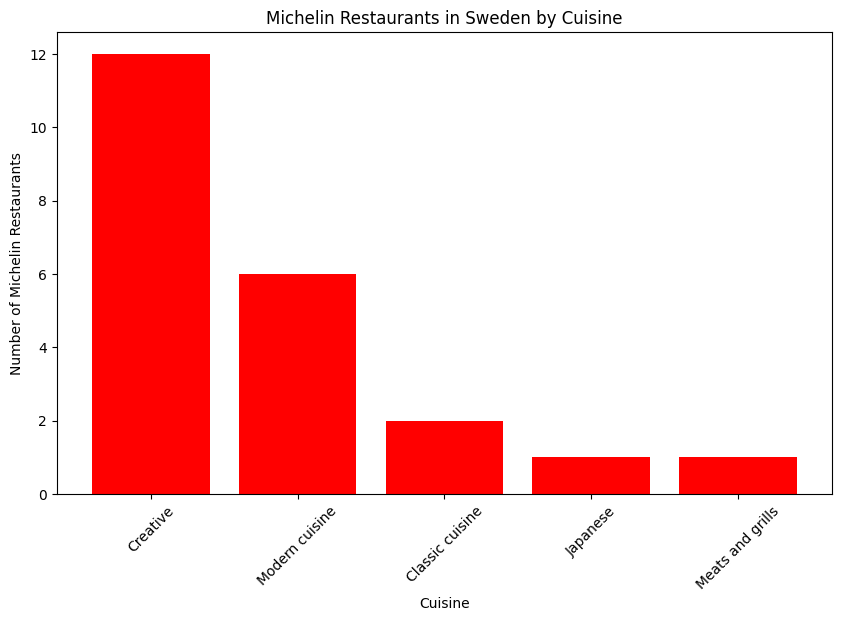

In [6]:
# 4. Count the number of Swedish Michelin restaurant per cuisine. 
#     - Show your results in a histogram
# nordic_countries = ['Sweden', 'Norway', 'Iceland', 'Denmark', 'Finland']

cuisine = [
    restaurant.cuisine
    for restaurant in restaurants
    if restaurant.region == 'Sweden'
]
cuisine_count = Counter(cuisine)


plt.figure(figsize = (10, 6))
plt.bar(cuisine_count.keys(), cuisine_count.values(), color='red')
plt.xlabel('Cuisine')
plt.ylabel('Number of Michelin Restaurants')
plt.title('Michelin Restaurants in Sweden by Cuisine')
plt.xticks(rotation = 45)
plt.show()

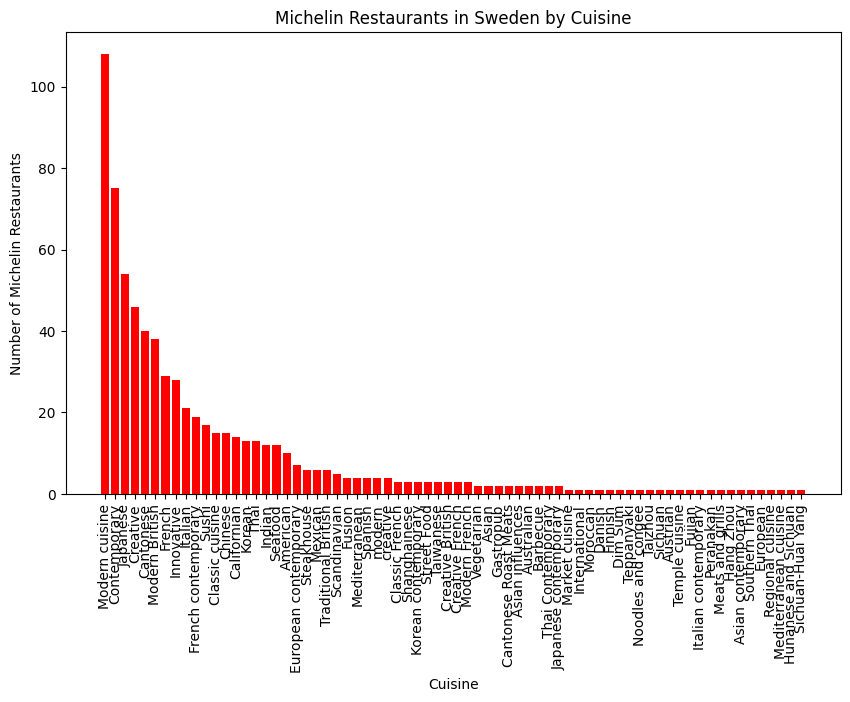

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

cuisine_count = Counter(restaurant.cuisine for restaurant in restaurants)
cousine, count = zip(*sorted(cuisine_count.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize = (10, 6))
plt.bar(cousine, count, color='red')
plt.xlabel('Cuisine')
plt.ylabel('Number of Michelin Restaurants')
plt.title('Michelin Restaurants in Sweden by Cuisine')
plt.xticks(rotation = 90)
plt.show()

In [41]:
import csv
from plotly.graph_objs import Scattergeo, Layout
from plotly import offline
       
lats = [restaurant.location.latitude for restaurant in restaurants]
lons = [restaurant.location.longitude for restaurant in restaurants]
names = [restaurant.name for restaurant in restaurants]
star_ratings = [restaurant.stars for restaurant in restaurants]

def get_price_range_label(price):
    if 1 <= len(price) <= 2:
        return 'Plus'
    if 3 <= len(price) <= 4:
        return 'Premium'
    if 5 <= len(price):
        return 'Premuim Plus'

price_ranges = [get_price_range_label(restaurant.price) for restaurant in restaurants]

text_labels = [
    f"Name: {name}<br>Stars: {stars}<br>Price range: {price_range}"
    for name, stars, price_range in zip(names, star_ratings, price_ranges)
]

trace = Scattergeo(
    lat=lats,
    lon=lons,
    text=text_labels,
    mode='markers',
    marker=dict(
        size=8,
        opacity=0.8,
        colorscale='Viridis',
        color=star_ratings,
        colorbar=dict(
            title='Star Ratings'
        )
    )
)


layout = Layout(
    title = 'All Michelin Restaurants',
    geo=dict(
        scope='world'
    )
)
data = [trace]

fig = dict(data=data, layout=layout)
offline.plot(fig, filename= 'all_michelin_restaurants.html')

# 6. Show in a map all Michelin restaurants.
#     - The circle shall be colored based on the price. Use a color scale.
#     - Hovering over a restaurant shall show the following information:
#         - Restaurant name
#         - Latitude
#         - Longitude
#         - Price. Represented as a number between 1 to 5.
#         - Number of stars. Represented as a number between 1 to 3.



'all_michelin_restaurants.html'

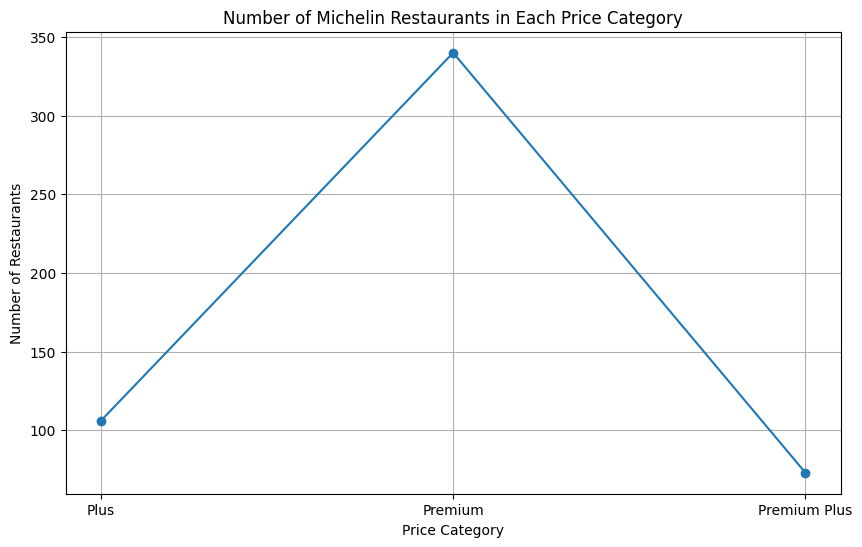

In [37]:
import matplotlib.pyplot as plt
price_categories = {
    'Plus' : ('$', '$$',),
    'Premium' : ('$$$', '$$$$',),
    'Premium Plus': ('$$$$$',),
}

category_counts = {category: 0 for category in price_categories}

for restaurant in restaurants:
    for category, price_range in price_categories.items():
        if restaurant.price in price_range:
            category_counts[category] += 1


categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(categories, counts, marker= 'o')
plt.title('Number of Michelin Restaurants in Each Price Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Restaurants')
plt.grid(True)
plt.show()
